In [1]:
# Task 2 CREDIT CARD FRAUD DETECTION using machine learning - Random Forest classifier submitted by Harinandhan
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


In [2]:
# Credit Card Transactions Fraud Detection Dataset which is given by CodSoft
# Load the dataset from the csv file using pandas 
data = pd.read_csv("fraudTrain.csv")
data = pd.read_csv("fraudTest.csv")



In [3]:

data.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:

print(data.shape)
print(data.describe())


(555719, 23)
          Unnamed: 0        cc_num            amt            zip  \
count  555719.000000  5.557190e+05  555719.000000  555719.000000   
mean   277859.000000  4.178387e+17      69.392810   48842.628015   
std    160422.401459  1.309837e+18     156.745941   26855.283328   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%    138929.500000  1.800429e+14       9.630000   26292.000000   
50%    277859.000000  3.521417e+15      47.290000   48174.000000   
75%    416788.500000  4.635331e+15      83.010000   72011.000000   
max    555718.000000  4.992346e+18   22768.110000   99921.000000   

                 lat           long      city_pop     unix_time  \
count  555719.000000  555719.000000  5.557190e+05  5.557190e+05   
mean       38.543253     -90.231325  8.822189e+04  1.380679e+09   
std         5.061336      13.721780  3.003909e+05  5.201104e+06   
min        20.027100    -165.672300  2.300000e+01  1.371817e+09   
25%        34.668900     -96.798000  7.

In [5]:
# Code : Imbalance in the data
fraud = data[data['Unnamed: 0'] == 1]
valid = data[data['Unnamed: 0'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Unnamed: 0'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Unnamed: 0'] == 0])))


1.0
Fraud Cases: 1
Valid Transactions: 1


In [6]:
# Printing the amount details for Fraudulent Transaction
print("amt")
fraud.amt.describe()


amt


count     1.00
mean     29.84
std        NaN
min      29.84
25%      29.84
50%      29.84
75%      29.84
max      29.84
Name: amt, dtype: float64

In [7]:
from datetime import datetime

# Sample datetime string
datetime_str = '2020-06-21 12:14:25'

# Convert the datetime string to a datetime object
datetime_obj = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')

# If you need a float representation, you can get the timestamp
timestamp = datetime_obj.timestamp()

# Output the results
print("Datetime Object:", datetime_obj)
print("Timestamp (float):", timestamp)


Datetime Object: 2020-06-21 12:14:25
Timestamp (float): 1592721865.0


In [8]:
import pandas as pd

# Load data from a CSV file
data = pd.read_csv('fraudTrain.csv')


In [9]:
# Define the input features (X) and the target variable (Y)
X = data[['cc_num', 'merchant', 'amt']]
Y = data['is_fraud']


In [10]:
import pandas as pd

# Load data from a CSV file
data = pd.read_csv('fraudTrain.csv')

# Define the input features (X) and the target variable (Y)
X = data[['cc_num', 'merchant', 'amt']]
Y = data['is_fraud']

# Display the first few rows of X and Y
print("Input Parameters (X):")
print(X.head())

print("\nOutput Values (Y):")
print(Y.head())


Input Parameters (X):
             cc_num                            merchant     amt
0  2703186189652095          fraud_Rippin, Kub and Mann    4.97
1      630423337322     fraud_Heller, Gutmann and Zieme  107.23
2    38859492057661                fraud_Lind-Buckridge  220.11
3  3534093764340240  fraud_Kutch, Hermiston and Farrell   45.00
4   375534208663984                 fraud_Keeling-Crist   41.96

Output Values (Y):
0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64


In [11]:
# dividing the X and the Y from the dataset
X = data.drop(['amt'], axis = 1)
Y = data["is_fraud"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing 
# (its a numpy array with no columns)
xData = X.values
yData = Y.values


(1296675, 22)
(1296675,)


In [12]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data from a CSV file
data = pd.read_csv('fraudTrain.csv')

# Define the input features (X) and the target variable (Y)
X = data[['cc_num', 'merchant', 'amt']]
Y = data['is_fraud']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set - X_train shape:", X_train.shape)
print("Training set - Y_train shape:", Y_train.shape)
print("Testing set - X_test shape:", X_test.shape)
print("Testing set - Y_test shape:", Y_test.shape)


Training set - X_train shape: (1037340, 3)
Training set - Y_train shape: (1037340,)
Testing set - X_test shape: (259335, 3)
Testing set - Y_test shape: (259335,)


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data from a CSV file
data = pd.read_csv('fraudTrain.csv')

# Define the input features (X) and the target variable (Y)
X = data[['cc_num', 'amt', 'unix_time']]  # Replace with your actual feature columns
Y = data['is_fraud']  # Replace with your actual target column

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the testing set
Y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9957468139664912
Confusion Matrix:
 [[257625    190]
 [   913    607]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.76      0.40      0.52      1520

    accuracy                           1.00    259335
   macro avg       0.88      0.70      0.76    259335
weighted avg       1.00      1.00      1.00    259335



In [16]:
yPred = model.predict(X_test)


In [18]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


The model used is Random Forest classifier
The accuracy is 0.9957468139664912
The precision is 0.7616060225846926
The recall is 0.3993421052631579
The F1-Score is 0.5239533880017263
The Matthews correlation coefficient is0.5497021418982725


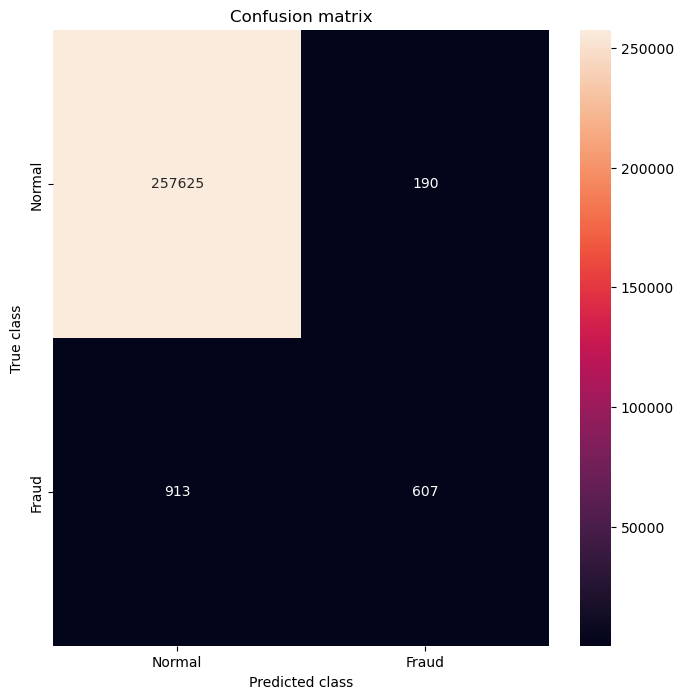

In [20]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(8, 8))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
